In [2]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.naive_bayes import MultinomialNB

# Steps in the pipeline for natural language processing 
  1. Acquiring and loading the data
  2. Cleaning the dataset
  3. Removing extra symbols 
  4. Removing punctuations
  5. Removing the stopwords
  6. Tokenization
  7. Pickle file

In [3]:
# load datasets
FAKE_NEWS = pd.read_csv('/home/caleb/mlProject/fake-news-pred-with-nlp/data/Fake.csv')
REAL_NEWS = pd.read_csv('/home/caleb/mlProject/fake-news-pred-with-nlp/data/True.csv')

In [8]:
REAL_NEWS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [ ]:
REAL_NEWS.shape, FAKE_NEWS.shape

((21417, 4), (23481, 4))

In [7]:
# Since there are no labels in the two sets of data, we can create labels to distinguish if the news
# is fake or not.
real = REAL_NEWS['label'] = 1
fake = FAKE_NEWS['label'] = 0

In [8]:
#drop unnecessary columns
real = REAL_NEWS.drop(['date'], axis=1)
fake = FAKE_NEWS.drop(['date'], axis=1)

In [9]:
# concatenate the datasets
data = pd.concat([real, fake], axis=0)

In [39]:
data.head()

,title,text,subject,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1


In [46]:
# labl = data['label']
# cols =  data.drop(['label'], axis=1)



In [47]:
#cols.head()

,title,text,subject
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews


In [60]:
data['content'] = data['title'] + ' ' + data['subject'] + ' ' + data['text'] 

In [61]:
data.head()

,title,text,subject,label,content
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,1,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,1,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,1,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,1,Trump wants Postal Service to charge 'much mor...


In [62]:
data['content']

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: content, Length: 44898, dtype: object

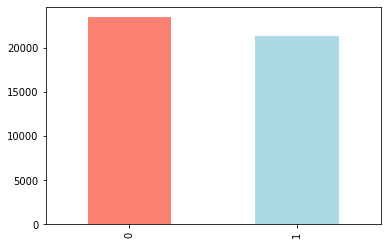

In [63]:
# Check if the labels are balanced
data.label.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

#### Labels are quite balanced. Proceed.

### **NLP**

In [64]:
# Remove urls
text = re.sub(r'^https?:\/\/.*[\r\n]*', '', str(data['content']), flags=re.MULTILINE)

# Remove user @ references and ‘#’ from text
text = re.sub(r'\@\w+|\#',"", text)

In [18]:
# # Remove urls
# title = re.sub(r'^https?:\/\/.*[\r\n]*', '', str(data['title']), flags=re.MULTILINE)

# # Remove user @ references and ‘#’ from text
# title = re.sub(r'\@\w+|\#',"", title)

In [19]:
# # Remove urls
# subject = re.sub(r'^https?:\/\/.*[\r\n]*', '', str(data['subject']), flags=re.MULTILINE)

# # Remove user @ references and ‘#’ from text
# subject = re.sub(r'\@\w+|\#',"", subject)

In [20]:
# dataset = text + title + subject

In [65]:
# remove punctuations
text.translate(str.maketrans("","", string.punctuation))

'0        As US budget fight looms Republicans flip t\n1        US military to accept transgender recruits o\n2        Senior US Republican senator Let Mr Muell\n3        FBI Russia probe helped by Australian diplomat\n4        Trump wants Postal Service to charge much mor\n                                                       \n23476    McPain John McCain Furious That Iran Treated \n23477    JUSTICE Yahoo Settles Email Privacy Classac\n23478    Sunnistan US and Allied ‘Safe Zone’ Plan to T\n23479    How to Blow 700 Million Al Jazeera America F\n23480    10 US Navy Sailors Held by Iranian Military \nName content Length 44898 dtype object'

In [66]:
stop_words = set(stopwords.words('english'))

# word tokenization
tokens = word_tokenize(text)
words = [w for w in tokens if not w in stop_words]

In [67]:
# convert the tokens into meaningful numbers with TF-IDF.
# Use the TF-IDF method to extract and build the features for 
# our machine learning pipeline.
tf_vector = TfidfVectorizer(sublinear_tf=True)
tf_vector.fit(data['content'])

TfidfVectorizer(sublinear_tf=True)

<hr />

### **ML PIPELINE**

In [28]:
# t1 = tf_vector.transform(data['text'].ravel())
# t2 = tf_vector.transform(data['title'].ravel())
# t3 = tf_vector.transform(data['subject'].ravel())

In [68]:
# separate the label from the other features and transform it

X_text = tf_vector.transform(data['content'].ravel())
y_values = np.array(data['label'].ravel())

In [69]:
# encode ...
le = preprocessing.LabelEncoder()
le.fit(y_values)
le.transform(y_values)

array([1, 1, 1, ..., 0, 0, 0])

In [70]:
# split data with sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, y_values, test_size=0.2, random_state=0)

In [71]:
# use the logistic regression to train the model
log_model = LogisticRegression(solver='lbfgs')
log_model.fit(X_train, y_train)

LogisticRegression()

In [72]:
# make prediction with the test data
y_predict = log_model.predict(X_test)

In [73]:
# model evaluation (LR)
print('Accuracy score: ', round(accuracy_score(y_test, y_predict) *100), '%')
print('--------------------------------------- \n')
print(classification_report(y_test, y_predict))
print('--------------------------------------- \n')
print('Confusion matrix: \n',confusion_matrix(y_test, y_predict))

Accuracy score:  99 %
--------------------------------------- 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4670
           1       0.99      0.99      0.99      4310

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

--------------------------------------- 

Confusion matrix: 
 [[4645   25]
 [  22 4288]]


In [74]:
# use MNB to train the model
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [75]:
# model evaluation (MNB)
print('Accuracy score: ', round(accuracy_score(y_test, y_pred) *100), '%')
print('--------------------------------------- \n')
print(classification_report(y_test, y_pred))
print('--------------------------------------- \n')
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))

Accuracy score:  95 %
--------------------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      4670
           1       0.96      0.94      0.95      4310

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

--------------------------------------- 

Confusion matrix: 
 [[4486  184]
 [ 241 4069]]


In [76]:
import pickle
pickle.dump(model, open('/home/caleb/mlProject/fake-news-pred-with-nlp/model/naiveBayes.pkl', 'wb'))

pickle.dump(tf_vector, open('/home/caleb/mlProject/fake-news-pred-with-nlp/model/tfidfvect.pkl', 'wb'))